<a href="https://colab.research.google.com/github/urszkam/AoC_2022/blob/main/Copy_of_BiG_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

### **Podstawowe operacje**
1. **Wczytywanie danych:**
   - Wczytaj plik `tips_1MLN.parquet.gz` do DataFrame i wyświetl pierwsze 10 wierszy oraz informacje o strukturze danych.
   - Zmień typ danych kolumn `sex`, `smoker`, `day` oraz `time` w DataFrame `df` na kategoryczny.
   - Następnie, zweryfikuj czy zmiana typu danych została poprawnie wykonana poprzez wyświetlenie informacji o strukturze danych (np. używając metody `info()` lub wyświetlając pierwsze kilka wierszy DataFrame).  
   - Porównaj rozmiar pamięci zajmowanej przez DataFrame przed i po zmianie typu danych.


In [ ]:
!wget https://github.com/marcin119a/big/raw/refs/heads/main/tips_1MLN.parquet.gz

--2025-09-20 10:18:24--  https://github.com/marcin119a/big/raw/refs/heads/main/tips_1MLN.parquet.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcin119a/big/refs/heads/main/tips_1MLN.parquet.gz [following]
--2025-09-20 10:18:25--  https://raw.githubusercontent.com/marcin119a/big/refs/heads/main/tips_1MLN.parquet.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974898 (3.8M) [application/octet-stream]
Saving to: ‘tips_1MLN.parquet.gz’

tips_1MLN.parquet.g 100%[===================>]   3.79M  --.-KB/s    in 0.06s   

2025-09-20 10:18:25 (62.9 MB/s) - ‘tips_1MLN.parquet.gz’ saved [3974898/3

In [ ]:
import pandas as pd
df = pd.read_parquet('tips_1MLN.parquet.gz')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,25.03,9.26,Female,Yes,Sat,Lunch,3
1,17.84,6.82,Female,No,Sat,Dinner,5
2,12.31,4.38,Female,Yes,Fri,Lunch,5
3,40.23,3.90,Male,No,Thur,Dinner,1
4,12.15,5.78,Female,Yes,Fri,Lunch,4
5,29.91,3.07,Female,No,Thur,Lunch,6
6,20.49,1.32,Female,No,Thur,Lunch,6
7,18.56,4.15,Male,No,Sun,Dinner,6
8,29.26,8.63,Female,No,Fri,Dinner,4
9,13.80,1.22,Male,No,Fri,Dinner,3


In [ ]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['day'] = df['day'].astype('category')
df['time'] = df['time'].astype('category')

In [ ]:
df['total_bill'] = pd.to_numeric(df['total_bill'], downcast='float')
df['tip'] = pd.to_numeric(df['tip'], downcast='float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   total_bill  1000000 non-null  float32 
 1   tip         1000000 non-null  float32 
 2   sex         1000000 non-null  category
 3   smoker      1000000 non-null  category
 4   day         1000000 non-null  category
 5   time        1000000 non-null  category
 6   size        1000000 non-null  int64   
dtypes: category(4), float32(2), int64(1)
memory usage: 19.1 MB


In [ ]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,25.030001,9.26,Female,Yes,Sat,Lunch,3
1,17.840000,6.82,Female,No,Sat,Dinner,5
2,12.310000,4.38,Female,Yes,Fri,Lunch,5
3,40.230000,3.90,Male,No,Thur,Dinner,1
4,12.150000,5.78,Female,Yes,Fri,Lunch,4
5,29.910000,3.07,Female,No,Thur,Lunch,6
6,20.490000,1.32,Female,No,Thur,Lunch,6
7,18.559999,4.15,Male,No,Sun,Dinner,6
8,29.260000,8.63,Female,No,Fri,Dinner,4
9,13.800000,1.22,Male,No,Fri,Dinner,3


---

### **Optymalizacja i monitorowanie**
* **Profilowanie danych:**
    - Przeanalizuj próbkę 1% danych z DataFrame i podsumuj jej strukturę z użyciem `.describe()`.


In [ ]:
sample = df.sample(frac=0.01)

sample.describe()

,total_bill,tip,size
count,10000.000000,10000.000000,10000.000000
mean,20.290255,5.030133,3.541200
std,9.447857,1.958043,1.700762
min,5.000000,1.000000,1.000000
25%,13.180000,3.630000,2.000000
50%,20.020000,5.010000,4.000000
75%,26.700001,6.350000,5.000000
max,58.730000,13.570000,6.000000


In [ ]:
df.memory_usage()

,0
Index,132
total_bill,4000000
tip,4000000
sex,1000124
smoker,1000124
day,1000204
time,1000124
size,8000000
bill_share,4000000
mean_bill,8000000



---

### **Filtrowanie danych**
1. Oblicz średnią wartość rachunku dla wszystkich płci.
2. Porównaj średnią wartość napiwku dla palących i niepalących gości.
3. Sprawdź, który dzień tygodnia jest najbardziej popularny w restauracji na podstawie liczby obsłużonych gości.
4. Oblicz procentowy udział płci w całkowitej liczbie gości.
5. Znajdź dzień tygodnia, w którym goście zostawiają największe napiwki.
6. Porównaj średnią wartość rachunku dla grup o różnej liczbie osób przy stole.
7. Oblicz procentowy udział lunchu i kolacji w całkowitej liczbie posiłków.
8. Znajdź najczęściej występujący rozmiar grupy.

W celu rozwiązania tych zadań można użyć różnych funkcji i metod dostępnych w bibliotece pandas, takich jak mean(), max(), min(), groupby(), value_counts(), sum(), oraz dodawanie nowych kolumn poprzez operator.

---

In [ ]:
df.groupby('sex')['total_bill'].mean()

/tmp/ipython-input-3379495421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


,total_bill
sex,
Female,20.278515
Male,20.284437


In [ ]:
df.groupby('smoker')['tip'].mean()

/tmp/ipython-input-2966249494.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['tip'].mean()


,tip
smoker,
No,5.014082
Yes,5.017187


In [64]:
df.groupby('day')['size'].sum().idxmax()

/tmp/ipython-input-1451445571.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['size'].sum().idxmax()


'Fri'

In [ ]:
df.groupby("sex")["size"].sum() / df["size"].sum() * 100

/tmp/ipython-input-4281199781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex")["size"].sum() / df["size"].sum() * 100


,size
sex,
Female,50.036098
Male,49.963902


In [65]:
df.groupby('day')['tip'].sum().idxmax()

/tmp/ipython-input-3019025853.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip'].sum().idxmax()


'Fri'

In [ ]:
df.groupby('size')['total_bill'].mean()

,total_bill
size,
1,20.262281
2,20.312996
3,20.254396
4,20.280645
5,20.293190
6,20.285473


In [ ]:
df['time'].value_counts() / df['time'].value_counts().sum() * 100

,count
time,
Lunch,50.07
Dinner,49.93


In [ ]:
df['size'].mode()

,size
0,3




### **Tworzenie nowych kolumn**
**Nowe kolumny:**
   - Dodaj kolumnę z procentowym stosunkiem napiwku do całkowitego rachunku.
   - Dodaj kolumnę z wartością średniego rachunku na osobę.

---


In [ ]:
df['tip_percentage'] = df['tip'] / df['total_bill'] * 100


In [ ]:
df['mean_bill'] = (df['total_bill'] / df['size']).round(2)

In [ ]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,mean_bill,tip_percentage
0,25.030001,9.26,Female,Yes,Sat,Lunch,3,8.34,36.995605
1,17.840000,6.82,Female,No,Sat,Dinner,5,3.57,38.228699
2,12.310000,4.38,Female,Yes,Fri,Lunch,5,2.46,35.580830



### **Standaryzacja i kwantyle**
9. **Standaryzacja:**
   - Znormalizuj wartości w kolumnie `tip_z_score` za pomocą z-score i zrób nową kolumnę tip_z_score.

10. **Kwantyle:**
    - Oblicz kwartyle (Q1, Q2, Q3) dla kolumny `tip_z_score`.




In [ ]:
std_ = df['tip'].std()
mean_ = df['tip'].mean()
df['tip_z_score'] = (df['tip'] - mean_) / std_

In [ ]:
print(df["tip_z_score"].quantile(0.25))
print(df["tip_z_score"].quantile(0.50))
print(df["tip_z_score"].quantile(0.75))

-0.6974093317985535
-0.007984327152371407
0.6814407110214233


In [61]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,mean_bill,tip_percentage,tip_z_score
0,25.030001,9.26,Female,Yes,Sat,Lunch,3,8.34,36.995605,2.167535
1,17.840000,6.82,Female,No,Sat,Dinner,5,3.57,38.228699,0.921463
2,12.310000,4.38,Female,Yes,Fri,Lunch,5,2.46,35.580830,-0.324609
3,40.230000,3.90,Male,No,Thur,Dinner,1,40.23,9.694258,-0.569738
4,12.150000,5.78,Female,Yes,Fri,Lunch,4,3.04,47.572021,0.390350


---

### **Zaawansowane operacje**
11. **Eksport danych:**
    - Wybierz wszystkie rachunki dotyczące kolacji (`Dinner`), gdy napiwek jest mniejszy niż 20$, i zapisz wyniki do pliku `dinner_tips.parquet.gz`.

12. **Wizualizacja:**
    - Narysuj wykres punktowy przedstawiający zależność między całkowitym rachunkiem (`total_bill`) a napiwkiem (`tip`).
    - Stwórz wykres liniowy przedstawiający średni rachunek w zależności od liczby osób przy stole (`size`).

In [ ]:
dinner = df[(df['tip'] < 20) & (df['time'] == 'Dinner')]
dinner.to_parquet('dinner_tips.parquet.gz', compression='gzip')

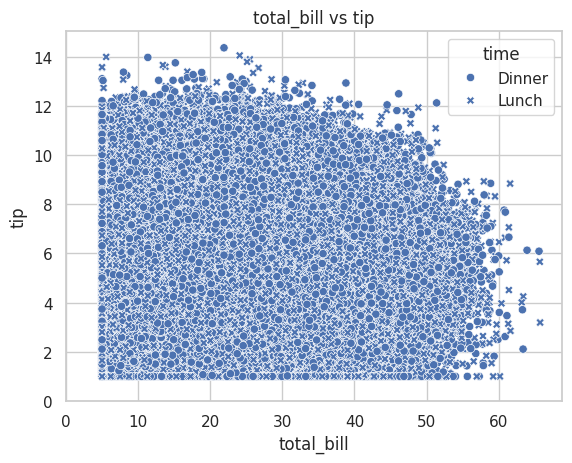

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="total_bill", y="tip", style="time")
plt.title("total_bill vs tip")
plt.xlim(0)
plt.ylim(0)
plt.show()

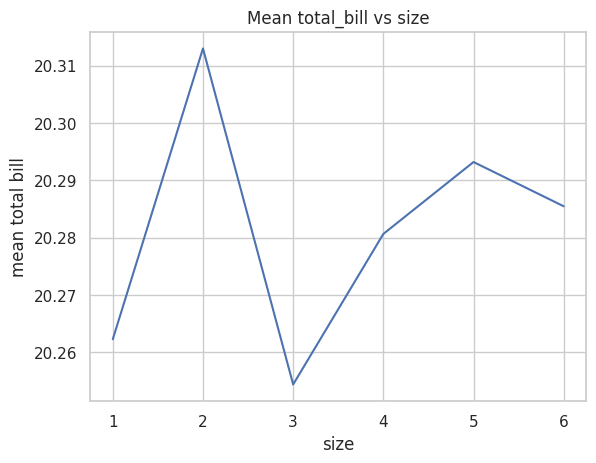

In [57]:

sns.lineplot(data=df.groupby("size")["total_bill"].mean().reset_index(), x="size", y="total_bill")
plt.title("Mean total_bill vs size")
plt.xlabel("size")
plt.ylabel("mean total bill")
plt.show()



---

**Analiza danych napiwków 100 mln:**
    - Stwórz raport na temat zależności między wielkością rachunku a wysokością napiwku dla różnych dni tygodnia. Uwzględnij:
      - Średnią wartość rachunku i napiwku.
      - Wykresy punktowy.


In [ ]:
!pip install memory_profiler

In [ ]:

!wget https://students.mimuw.edu.pl/~mw404851/dane.zip


--2025-09-20 11:19:11--  https://students.mimuw.edu.pl/~mw404851/dane.zip
Resolving students.mimuw.edu.pl (students.mimuw.edu.pl)... 193.0.96.129, 2001:6a0:5001:1::3
Connecting to students.mimuw.edu.pl (students.mimuw.edu.pl)|193.0.96.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 396807884 (378M) [application/zip]
Saving to: ‘dane.zip’

dane.zip            100%[===================>] 378.42M  22.4MB/s    in 19s     

2025-09-20 11:19:30 (20.3 MB/s) - ‘dane.zip’ saved [396807884/396807884]



In [ ]:
!mkdir dane && unzip dane.zip -d dane

Archive:  dane.zip
  inflating: dane/data_part_1.gz.parquet  
  inflating: dane/data_part_0.gz.parquet  
  inflating: dane/data_part_8.gz.parquet  
  inflating: dane/data_part_2.gz.parquet  
  inflating: dane/data_part_4.gz.parquet  
  inflating: dane/data_part_7.gz.parquet  
  inflating: dane/data_part_5.gz.parquet  
  inflating: dane/data_part_9.gz.parquet  
  inflating: dane/data_part_3.gz.parquet  
  inflating: dane/data_part_6.gz.parquet  



### Zadanie: Łączenie danych z plików Parquet po 10mln wierszy
- Opis zadania:
Twoim zadaniem jest załadowanie danych z wielu plików .parquet znajdujących się w katalogu /content/dane, połączenie ich w jeden zbiór danych (DataFrame).

Kroki do wykonania:
- Załaduj wymagane biblioteki: pandas, pathlib
- Wczytaj dane: Wczytaj tylko wybrane kolumny: total_bill, tip oraz sex z każdego pliku .parquet.
- Użyj pętli, aby przejrzeć wszystkie pliki w katalogu /content/dane.
- Użyj pd.concat() do scalenia wszystkich ramek danych w jeden zbiór.
- Spróbuj zoptymalizować kod, stosując: Zamianę typów danych (np. kolumnę sex na pandas.Categorical).
- Usuń zmienną chunk.


In [58]:
import pandas as pd
import pathlib
import os
from memory_profiler import memory_usage

In [59]:
path = "/content/dane"
frames = []
columns = ["total_bill", "tip", "sex"]
memory_before = memory_usage()[0]
for file in os.listdir(path):
    if file.endswith(".parquet"):
        file_path = os.path.join(path, file)
        partial_df = pd.read_parquet(file_path, columns=columns)
        frames.append(partial_df)

data = pd.concat(frames, ignore_index=True)
print(f"Zużycie pamięci RAM: {memory_usage()[0] - memory_before:.2f} MB")
del partial_df
del frames

print(f"Zużycie pamięci RAM: {memory_usage()[0] - memory_before:.2f} MB")

Zużycie pamięci RAM: 4960.00 MB
Zużycie pamięci RAM: 2671.15 MB


In [ ]:


files = pathlib.Path("/content/dane").glob("*.parquet")

memory_before = memory_usage()[0]  # Pamięć przed wykonaniem

# Łączenie plików w jedną ramkę danych
dataframes = []  # Lista na DataFrame'y
for path in files:
    chunk = pd.read_parquet(path, columns=['total_bill', 'tip', 'sex'])
    dataframes.append(chunk)

result = pd.concat(dataframes, axis=0, ignore_index=True)
memory_after = memory_usage()[0]   # Pamięć po wykonaniu

# Wynik
print(f"Zużycie pamięci RAM: {memory_after - memory_before:.2f} MB")


Zużycie pamięci RAM: -667.29 MB
